# Step 1 - Clean and prepare data: 

In [1]:
import pandas as pd
import numpy as np

# read data
data = pd.read_csv("Data Science HW design model.csv")
cnames = data.columns.values
data.head()

/Users/wangyuxi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


## Given 0 values are missing values
## Find columns with over 40%(self-imposed threshold) 0 values, change into boolean variables: if 0/null or not


In [2]:
low_zero_vars = []      # Variables with ≤ 40% zeros
low_zero_ratios = []    # Corresponding zero ratios
high_zero_vars = []     # Variables with > 40% zeros
no_zero_vars = []       # Variables without zeros

# Iterate over columns (excluding default)
for col in cnames[:-1]:  
    zero_count = (data[col] == 0).sum()  
    zero_ratio = zero_count / len(data[col])  

    if zero_count > 0:
        if zero_ratio <= 0.4:
            low_zero_vars.append(col)
            low_zero_ratios.append(zero_ratio)
        else:
            high_zero_vars.append(col)
    else:
        no_zero_vars.append(col)

print("Variables with lower zero values:\n", pd.DataFrame({'Variable': low_zero_vars, 'Zero Ratio': low_zero_ratios}), 
      "\n\nVariables with high zero ratio:", high_zero_vars, 
      "\n\nVariables without zeros:", no_zero_vars)

Variables with lower zero values:
    Variable  Zero Ratio
0        A1    0.024745
1        A3    0.000543
2        A4    0.000138
3        A5    0.000330
4        A6    0.000936
5        A7    0.022745
6        A8    0.000149
7        A9    0.036117
8       A10    0.044989
9       A11    0.000447
10      A13    0.008266
11      A14    0.000106
12      A15    0.000053
13      A16    0.137819
14      A17    0.001096
15      A18    0.192000
16      A19    0.290904
17      A20    0.000617
18      A22    0.079053
19      A25    0.001564
20      A26    0.301255
21      A27    0.376702
22      A28    0.144032
23      A29    0.251585 

Variables with high zero ratio: ['A23', 'A24', 'A30'] 

Variables without zeros: ['A2', 'A12', 'A21']


In [3]:
# Replace non-zero values with 1 in high-zero columns
data[high_zero_vars] = (data[high_zero_vars] != 0).astype(int)
data[high_zero_vars].head()


,A23,A24,A30
0,1,1,0
1,1,0,1
2,1,1,1
3,1,0,0
4,0,0,0


## Columns with 0-40% 0 values: Subtitute 0 by mean of non-zero values

In [4]:
# Loop through the low_zero_vars and replace zero values with calculated mean of non-zero values
for var in low_zero_vars:
    mean_non_zero = data.loc[data[var] != 0, var].mean()
    
    data.loc[data[var] == 0, var] = mean_non_zero

data[low_zero_vars].head()


,A1,A3,A4,A5,A6,A7,A8,A9,A10,A11,...,A17,A18,A19,A20,A22,A25,A26,A27,A28,A29
0,10.69,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,84.29,...,4305.85,0.15,0.090000,1.09,0.01,0.13,416.112697,574.326433,120.895358,38.544149
1,28.50,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,59.80,...,3616.67,0.78,0.140000,1.67,0.06,0.09,285.800000,574.326433,16.440000,1.980000
2,24.87,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,77.17,...,2301.54,0.62,0.150000,2.80,0.08,0.44,494.620000,135.410000,127.450000,46.000000
3,13.64,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,95.88,...,3419.60,0.09,0.158177,1.00,0.03,0.05,1015.190000,574.326433,210.630000,92.580000
4,4.50,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,94.55,...,3828.57,0.08,0.158177,2.69,0.01,0.04,416.112697,106.410000,79.000000,38.544149


## Generate correlation matrix


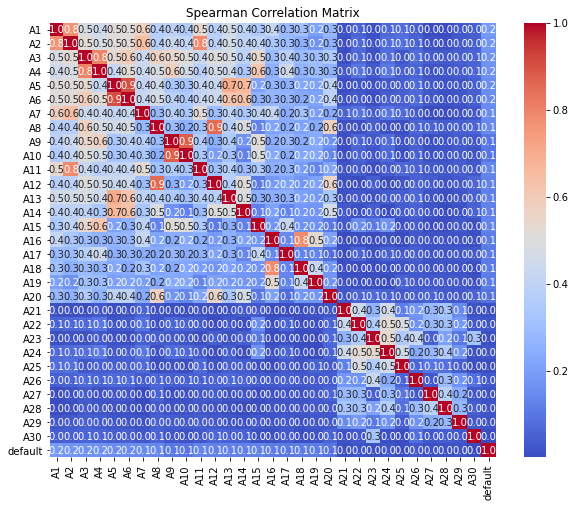

In [5]:
# Generate correlation matrix (absolute values)
corr_matrix = data.corr(method="spearman").abs()

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Spearman Correlation Matrix')
plt.show()


## Delete columns with higher/lower correlation 

In [6]:
# Set thresholds
high_threshold = 0.85


# Find pairs of variables with high correlation
high_corr_var = np.where(corr_matrix > high_threshold)

high_corr_var = [(data.columns[x], data.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly correlated variable pairs:", high_corr_var)

# Drop the second from each pair
columns_to_drop = []

for var1, var2 in high_corr_var:
    columns_to_drop.append(var2)

# Drop the selected columns with high correlation
drop_corr_data = data.drop(columns=columns_to_drop)

Highly correlated variable pairs: [('A5', 'A6'), ('A8', 'A12'), ('A9', 'A10')]


In [7]:
# Drop columns with low correlation to 'default'
low_threshold = 0.05

corr_with_default = drop_corr_data.corrwith(drop_corr_data['default']).abs()

low_corr_columns = corr_with_default[corr_with_default < low_threshold].index

print("Low correlated variable:", low_corr_columns)

# Drop the columns with low correlation to 'default'
clean_data = drop_corr_data.drop(columns=low_corr_columns)

Low correlated variable: Index(['A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], dtype='object')


In [8]:
clean_data.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A13,A14,A15,A16,A17,A18,A19,A20,default
0,10.69,86.10,8920.16,19912.85,30.42,1.18,145.41,2.236,84.29,16.01,52.18,123101.84,0.23,4305.85,0.15,0.090000,1.09,0
1,28.50,65.19,6564.00,6716.67,32.50,2.74,91.11,1.000,59.80,29.33,63.55,34275.73,0.80,3616.67,0.78,0.140000,1.67,0
2,24.87,73.79,4285.47,6463.75,40.50,2.84,93.90,2.400,77.17,39.92,61.95,84841.79,0.78,2301.54,0.62,0.150000,2.80,0
3,13.64,85.82,6887.56,9244.44,49.56,0.36,171.45,1.875,95.88,49.80,67.22,145261.11,0.09,3419.60,0.09,0.158177,1.00,0
4,4.50,95.92,8746.50,19987.50,32.75,0.92,153.25,2.000,94.55,17.43,50.70,120522.80,0.17,3828.57,0.08,0.158177,2.69,0


# Step 2 - Deal with Imbalanced Data
## SMOTE Oversampling

In [9]:
from sklearn.model_selection import train_test_split

og_X = clean_data.drop(columns=["default"])  # Feature variables
og_Y = clean_data["default"]  # Target variable

# Check 'deafult' data ratio
from collections import Counter

print('Default column data ratio:', Counter(og_Y))

Default column data ratio: Counter({0: 90000, 1: 4000})


In [10]:
# Apply SMOTE to do oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_smote, Y_smote = smote.fit_resample(og_X, og_Y)

# Split the data
X_train_smote,X_test_smote,Y_train_smote,Y_test_smote=train_test_split(X_smote, Y_smote,train_size=0.8,random_state=0)

print("Default column data ratio after oversampling: ",Counter(Y_smote))
print("The size of training group is: ",X_train_smote.shape[0],"\nThe size of testing group is: ",X_test_smote.shape[0])

Default column data ratio after oversampling:  Counter({0: 90000, 1: 90000})
The size of training group is:  144000 
The size of testing group is:  36000


# Step 3 - Build Model
## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

# Train the Random Forest model
rf_classifier = RandomForestClassifier(
    max_depth=5, 
    max_features=17, 
    n_estimators=30, 
    random_state=0, 
    bootstrap=True
)
rf_classifier.fit(X_train_smote, Y_train_smote)

# Predict on test set
Y_pred_rf = rf_classifier.predict(X_test_smote)

# Calculate error metrics
mae = mean_absolute_error(Y_test_smote, Y_pred_rf)
mse = mean_squared_error(Y_test_smote, Y_pred_rf)
mad = abs(Y_pred_rf.mean() - Y_test_smote.mean())
accuracy = accuracy_score(Y_test_smote, Y_pred_rf)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAD: {mad:.4f}")
print(f"Accuracy: {accuracy:.4%}")

# Compute confusion matrix & rate
cnf_matrix = confusion_matrix(Y_test_smote, Y_pred_rf)
TN, FP, FN, TP = cnf_matrix.ravel()

FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate

# Precision, Recall, F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall=TPR
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"False Positive Rate (FPR): {FPR:.4%}")
print(f"False Negative Rate (FNR): {FNR:.4%}")
print(f"True Positive Rate (TPR / Recall): {TPR:.4%}")
print(f"True Negative Rate (TNR): {TNR:.4%}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")

MAE: 0.2161
MSE: 0.2161
MAD: 0.0214
Accuracy: 78.3944%
False Positive Rate (FPR): 19.5700%
False Negative Rate (FNR): 23.6198%
True Positive Rate (TPR / Recall): 76.3802%
True Negative Rate (TNR): 80.4300%
F1 Score: 0.7804
Precision: 0.7977


## K-NN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train_smote, Y_train_smote)

# Predict on test set
Y_pred_knn = knn_classifier.predict(X_test_smote)

# Calculate error metrics
mae = mean_absolute_error(Y_test_smote, Y_pred_knn)
mse = mean_squared_error(Y_test_smote, Y_pred_knn)
mad = abs(Y_pred_knn.mean() - Y_test_smote.mean())
accuracy = accuracy_score(Y_test_smote, Y_pred_knn)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAD: {mad:.4f}")
print(f"Accuracy: {accuracy:.4%}")

# Compute confusion matrix & rates
cnf_matrix = confusion_matrix(Y_test_smote, Y_pred_knn)
TN, FP, FN, TP = cnf_matrix.ravel()

FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate

# Precision, Recall, F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TPR
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"False Positive Rate (FPR): {FPR:.4%}")
print(f"False Negative Rate (FNR): {FNR:.4%}")
print(f"True Positive Rate (TPR / Recall): {TPR:.4%}")
print(f"True Negative Rate (TNR): {TNR:.4%}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")

/Users/wangyuxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


MAE: 0.0816
MSE: 0.0816
MAD: 0.0464
Accuracy: 91.8389%
False Positive Rate (FPR): 12.8735%
False Negative Rate (FNR): 3.4982%
True Positive Rate (TPR / Recall): 96.5018%
True Negative Rate (TNR): 87.1265%
F1 Score: 0.9224
Precision: 0.8834


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
log_reg_2 = LogisticRegression(random_state=0)
log_reg_2.fit(X_train_smote, Y_train_smote)

# Make predictions
Y_pred_log_2 = log_reg_2.predict(X_test_smote)

# Calculate error metrics
mae = mean_absolute_error(Y_test_smote, Y_pred_log_2)
mse = mean_squared_error(Y_test_smote, Y_pred_log_2)
mad = abs(Y_pred_log_2.mean() - Y_test_smote.mean())
accuracy = accuracy_score(Y_test_smote, Y_pred_log_2)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAD: {mad:.4f}")
print(f"Accuracy: {accuracy:.4%}")

# Compute confusion matrix & rates
cnf_matrix = confusion_matrix(Y_test_smote, Y_pred_log_2)
TN, FP, FN, TP = cnf_matrix.ravel()

FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate

# Precision, Recall, F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TPR
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"False Positive Rate (FPR): {FPR:.4%}")
print(f"False Negative Rate (FNR): {FNR:.4%}")
print(f"True Positive Rate (TPR / Recall): {TPR:.4%}")
print(f"True Negative Rate (TNR): {TNR:.4%}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")


MAE: 0.2610
MSE: 0.2610
MAD: 0.0136
Accuracy: 73.9028%
False Positive Rate (FPR): 24.8646%
False Negative Rate (FNR): 27.3169%
True Positive Rate (TPR / Recall): 72.6831%
True Negative Rate (TNR): 75.1354%
F1 Score: 0.7368
Precision: 0.7471


/Users/wangyuxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## LogisticRegression: Class Weight Balancing

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

og_Xtrain,og_Xtest,og_Ytrain,og_Ytest=train_test_split(og_X, og_Y,train_size=0.8,random_state=0)

# Train Logistic Regression Model
log_reg_1 = LogisticRegression(random_state=0, class_weight="balanced")
log_reg_1.fit(og_Xtrain,og_Ytrain)

# Make predictions
Y_pred_log_1 = log_reg_1.predict(og_Xtest)

# Calculate error metrics
mae = mean_absolute_error(og_Ytest, Y_pred_log_1)
mse = mean_squared_error(og_Ytest, Y_pred_log_1)
mad = abs(Y_pred_log_1.mean() - og_Ytest.mean())
accuracy = accuracy_score(og_Ytest, Y_pred_log_1)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAD: {mad:.4f}")
print(f"Accuracy: {accuracy:.4%}")

# Compute confusion matrix & rates
cnf_matrix = confusion_matrix(og_Ytest, Y_pred_log_1)
TN, FP, FN, TP = cnf_matrix.ravel()

FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate

# Precision, Recall, F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TPR
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"False Positive Rate (FPR): {FPR:.4%}")
print(f"False Negative Rate (FNR): {FNR:.4%}")
print(f"True Positive Rate (TPR / Recall): {TPR:.4%}")
print(f"True Negative Rate (TNR): {TNR:.4%}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")

MAE: 0.2633
MSE: 0.2633
MAD: 0.2402
Accuracy: 73.6702%
False Positive Rate (FPR): 26.2755%
False Negative Rate (FNR): 27.5731%
True Positive Rate (TPR / Recall): 72.4269%
True Negative Rate (TNR): 73.7245%
F1 Score: 0.1872
Precision: 0.1075


/Users/wangyuxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Step 3 - Generate predictions:
## Apply best-performed model: K- NN

In [16]:
# Load validation data
val_data = pd.read_csv("Data Science HW design val.csv")

# Identify column types based on zero ratios
column_names = val_data.columns.values
low_zero_columns, high_zero_columns, no_zero_columns = [], [], []

for col in column_names[:-1]:  # Exclude target column
    zero_count = (val_data[col] == 0).sum()
    zero_ratio = zero_count / len(val_data[col])
    if zero_count > 0:
        if zero_ratio <= 0.4:
            low_zero_columns.append(col)  # Few zeros, replace with mean
        else:
            high_zero_columns.append(col)  # Many zeros, encode as binary
    else:
        no_zero_columns.append(col)  # No zeros, leave unchanged

# Encode high-zero columns as binary (1 if nonzero, 0 if zero)
val_data[high_zero_columns] = (val_data[high_zero_columns] != 0).astype(int)

# Replace zeros in low-zero columns with the mean of non-zero values
for col in low_zero_columns:
    mean_non_zero = val_data.loc[val_data[col] != 0, col].mean()
    val_data.loc[val_data[col] == 0, col] = mean_non_zero

# Drop high correlated columns
corr_matrix_val = val_data.corr(method="spearman").abs()
high_corr_var_val = np.where(corr_matrix_val > high_threshold)
high_corr_var_val = [(val_data.columns[x], val_data.columns[y]) for x, y in zip(*high_corr_var_val) if x != y and x < y]

columns_to_drop_val = []

for var1, var2 in high_corr_var_val:
    columns_to_drop_val.append(var2)

drop_corr_val=val_data.drop(columns=columns_to_drop)

# Drop low correlated columns
clean_val_data=drop_corr_val.drop(columns=low_corr_columns)

print(columns_to_drop, low_corr_columns)
clean_val_data.head()

['A6', 'A12', 'A10'] Index(['A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], dtype='object')


,A1,A2,A3,A4,A5,A7,A8,A9,A11,A13,A14,A15,A16,A17,A18,A19,A20,default
0,22.88,75.59,3367.08,6131.31,41.38,2.13,102.67,0.500,75.85,22.22,58.46,42131.54,0.650000,4005.22,0.330000,0.330000,1.25,1
1,15.94,86.26,5595.00,10867.86,52.29,3.05,124.94,3.200,75.00,15.73,63.36,148530.21,0.330000,2281.82,0.380000,0.167396,2.37,1
2,25.16,64.20,4758.44,7818.15,46.28,2.69,110.16,1.124,62.57,32.24,62.83,39652.58,0.550000,3050.54,0.360000,0.250000,1.51,1
3,19.50,77.81,5762.27,6290.00,58.14,2.44,119.92,1.222,82.50,48.73,66.29,86341.79,0.500000,4169.09,0.310000,0.270000,2.69,1
4,11.11,85.09,11400.50,20936.25,30.00,0.50,125.89,2.167,95.86,37.20,63.30,224497.30,0.344064,8970.00,0.249323,0.167396,1.25,1


In [17]:
# Define features and target
X_val = clean_val_data.drop(columns=["default"])  # Feature set
y_val = clean_val_data["default"]  # Target variable


# Apply best-performed model on validation data
y_val_pred = knn_classifier.predict(X_val)


# Calculate error metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
mad = abs(y_val_pred.mean() - y_val.mean())
accuracy = accuracy_score(y_val, y_val_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAD: {mad:.4f}")
print(f"Accuracy: {accuracy:.4%}")

# Compute confusion matrix & rates
cnf_matrix = confusion_matrix(y_val, y_val_pred)
TN, FP, FN, TP = cnf_matrix.ravel()

FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate

# Precision, Recall, F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TPR
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"False Positive Rate (FPR): {FPR:.4%}")
print(f"False Negative Rate (FNR): {FNR:.4%}")
print(f"True Positive Rate (TPR / Recall): {TPR:.4%}")
print(f"True Negative Rate (TNR): {TNR:.4%}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")

MAE: 0.2119
MSE: 0.2119
MAD: 0.0116
Accuracy: 78.8087%
False Positive Rate (FPR): 12.8500%
False Negative Rate (FNR): 76.8000%
True Positive Rate (TPR / Recall): 23.2000%
True Negative Rate (TNR): 87.1500%
F1 Score: 0.2222
Precision: 0.2131


/Users/wangyuxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
